In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


### Read Data

In [2]:
# line plot of time series
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
# load dataset
df = pd.read_csv('Resources/full.csv', header=0, index_col='DATE', parse_dates=True)

print('Shape of data', df.shape)

# display first few rows
df.head()

Shape of data (264, 11)


,Rate_High_School,Rate_Bachelors,Rate_Masters,Rate_Doctoral,Rate_Men,Rate_Women,Rate_Asian,Rate_Black,Rate_White,Rate_Latino,Rate_Overall
DATE,,,,,,,,,,,
2000-01-01,3.4,1.8,1.6,1.4,3.9,4.1,4.0,8.2,3.4,5.6,4.0
2000-02-01,3.4,1.6,1.6,1.4,4.1,4.1,3.4,8.1,3.6,5.7,4.1
2000-03-01,3.3,1.7,1.7,0.9,3.8,4.3,4.1,7.4,3.5,6.1,4.0
2000-04-01,3.3,1.5,1.2,0.6,3.7,4.0,3.1,7.0,3.4,5.5,3.8
2000-05-01,3.4,1.6,1.0,0.8,3.9,4.2,3.5,7.7,3.5,5.8,4.0


### Plot Your Data

<AxesSubplot:xlabel='DATE'>

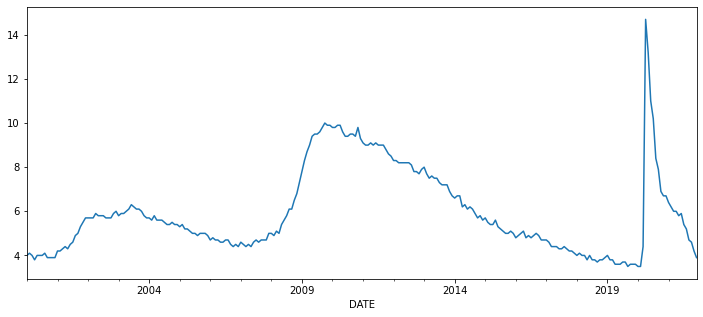

In [3]:
df['Rate_Overall'].plot(figsize=(12,5))

### Check for Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [6]:
ad_test(df['Rate_Overall'])

1. ADF :  -2.92252167817022
2. P-Value :  0.04279101681629297
3. Num of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 263
5. Critical Values :
	 1% :  -3.4554613060274972
	 5% :  -2.8725931472675046
	 10% :  -2.5726600403359887


### Figure Out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(df['Rate_Overall'], trace=True,
                         suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=557.473, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=559.263, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=559.203, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=555.474, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=558.404, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.512 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -276.737
Date:                Sat, 19 Mar 2022   AIC                            555.474
Time:                        15:49:57   BIC                            559.046
Sample:                             0   HQIC                           556.909
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4803      0.004    110.357      0.000       0.472       0.489
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):            374579.88
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              89.15   Skew:                            12.25
Prob(H) (two-sided):                  0.00   Kurtosis:                       186.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA

### Split Data into Training and Testing

In [10]:
print(df.shape)
train = df.iloc[:12]
test = df.iloc[-12:]
print(train.shape,test.shape)

(264, 11)
(12, 11) (12, 11)


### Train the Model

In [11]:
model=ARIMA(train['Rate_Overall'], order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Rate_Overall   No. Observations:                   12
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   8.014
Date:                Sat, 19 Mar 2022   AIC                            -14.029
Time:                        15:49:57   BIC                            -13.631
Sample:                    01-01-2000   HQIC                           -14.279
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0136      0.007      2.027      0.043       0.000       0.027
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.19   Prob(JB):                         0.91
Heteroskedasticity (H):               0.40   Skew:                            -0.17
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make Predictions on Test Set

In [12]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)
#pred.index=df.index[start:end+1]
#print(pred)

2001-01-01    3.9
2001-02-01    3.9
2001-03-01    3.9
2001-04-01    3.9
2001-05-01    3.9
2001-06-01    3.9
2001-07-01    3.9
2001-08-01    3.9
2001-09-01    3.9
2001-10-01    3.9
2001-11-01    3.9
2001-12-01    3.9
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='DATE'>

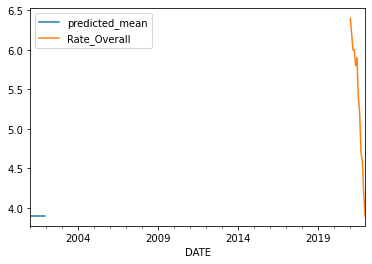

In [13]:
pred.plot(legend=True)
test['Rate_Overall'].plot(legend=True)

In [14]:
test['Rate_Overall'].mean()

5.358333333333334

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Rate_Overall']))
print(rmse)

1.6615755575156173


In [16]:
model2=ARIMA(df['Rate_Overall'], order=(0,1,0))
model2=model2.fit()
df.tail()

,Rate_High_School,Rate_Bachelors,Rate_Masters,Rate_Doctoral,Rate_Men,Rate_Women,Rate_Asian,Rate_Black,Rate_White,Rate_Latino,Rate_Overall
DATE,,,,,,,,,,,
2021-08-01,5.9,2.7,2.5,1.7,5.3,5.0,4.6,8.7,4.5,6.2,5.2
2021-09-01,5.7,2.5,2.1,1.6,5.0,4.5,4.1,7.8,4.2,6.1,4.7
2021-10-01,5.4,2.4,1.8,1.2,4.5,4.6,4.1,7.8,3.9,5.7,4.6
2021-11-01,5.2,2.2,1.5,0.9,4.2,4.2,3.7,6.5,3.7,5.2,4.2
2021-12-01,4.6,2.1,1.2,1.1,3.9,3.9,3.6,7.1,3.2,4.9,3.9


### For Future Dates

In [17]:
#index_future_dates=pd.date_range(start='2021-02-01', end='2021-03-01')
#print(index_future_dates)
pred=model2.predict(start=len(df), end=len(df)+28, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

NameError: name 'index_future_dates' is not defined

In [ ]:
pred.plot(figsize=(12,5), legend=True)